In [1966]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

In [1967]:
imagem = cv.imread(r'images/shot0009.png')
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)

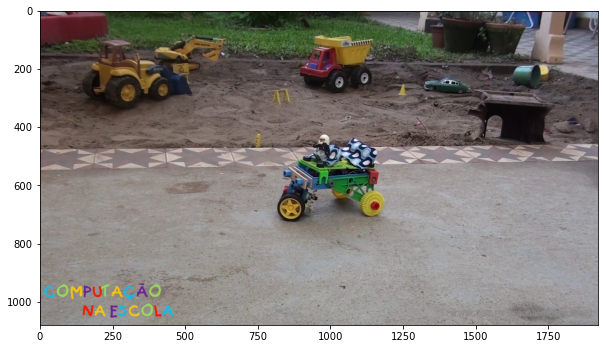

In [1968]:
plt.figure(figsize=(10,10))
plt.imshow(imagem)

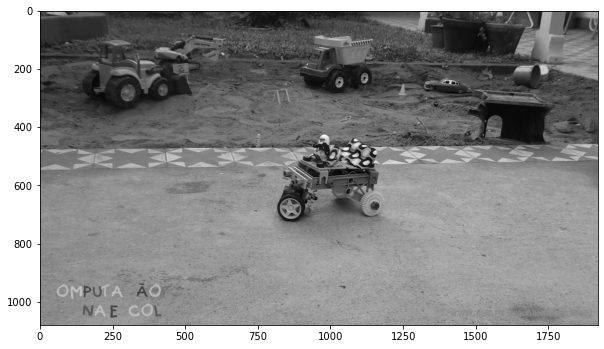

In [1969]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(imagem_cinza, cmap='gray')

Muitos detalhes: Altas frequências. (Detalhes de imagens)
Poucos detalhes: Baixa frequência. (Fundo de imagens)

Suavização de imagens.

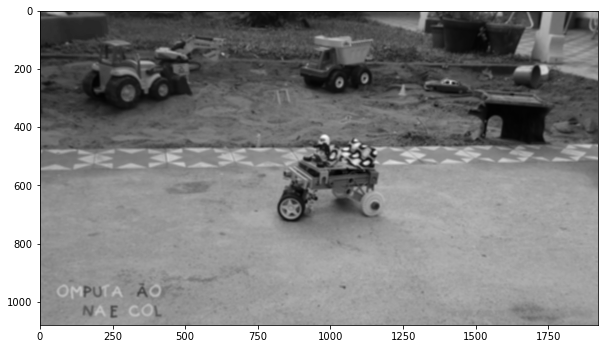

In [1970]:
imagem_suavizada = cv2.blur(imagem_cinza, (8,8))
plt.figure(figsize=(10,10))
plt.imshow(imagem_suavizada, cmap='gray')

Processo de limiarização.

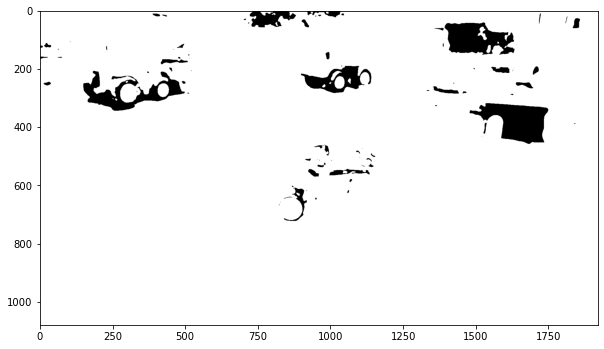

In [1971]:
_, imagem_limiar = cv2.threshold(imagem_suavizada, 30, 10, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(imagem_limiar, cmap='gray')

In [1972]:
contornos, _ = cv2.findContours(imagem_limiar, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Contornos: ", len(contornos))

Contornos:  107


In [1973]:
imagem_contorno = imagem.copy()

for contorno in contornos:
    (x,y,w,h) = cv2.boundingRect(contorno)
    #area = int(w) * int(h)
    
    area = cv2.contourArea(contorno)
    if area > 2000 and area < 4000 :
        razao_contorno = w/h
        #cv2.putText(imagem_contorno, "Area: " + str(area), (x,y+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
        #cv2.putText(imagem_contorno, "rAZAO: " + str(razao_contorno), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        #cv2.rectangle(imagem_contorno, (x,y), (x+w, y+h), (0,255,0), 2)

        if razao_contorno > 0.5 and razao_contorno < 1:
            cv2.rectangle(imagem_contorno, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(imagem_contorno, "Carrinho", (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 3)
            #cv2.putText(imagem_contorno, "Area: " + str(area), (x,y+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 3)
            #cv2.putText(imagem_contorno, "rAZAO: " + str(razao_contorno), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)
            cv2.line(imagem_contorno, (x,int(y+(h/2))), (int(x/2), int(y)), (0,255,0), 2)

        #cv2.drawContours(imagem_contorno, [contorno], -1, (0,255,0), 2)

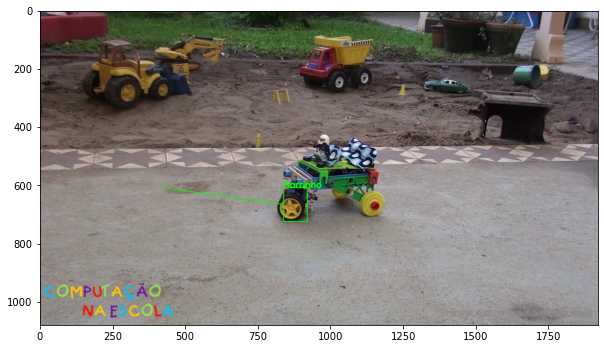

In [1974]:
plt.figure(figsize=(10,10))
plt.imshow(imagem_contorno, cmap='gray')